# Fraud Detection in Credit Card Transaction 
**By Sundara Swani Didde, and Jeet Ashwin Shah**

**Dataset used:** `https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud`

## Abstract
With a great increase in online shopping with credit cards being a common mode of payment, and the vulnerability being in the card itself, fraud was at its doorstep. Credit card fraud usually means using a credit card without the owner's knowledge. This project is going to focus on understanding the implemention of various machine learning techniques on the credit card transaction dataset.

## About the Dataset
The dataset has 492 frauds out of 284,807 transactions. It is a highly unbalanced, where the positive class which is in this case (fraud) is only 0.172% of all the transactions.

Due to confidentiality issues, the dataset only contains of the result of the PCA transformation. There are about 28 features `[V1,....,V28]`, which were obtained using PCA. The only features that were not transformed are `Time` and `Amount` 

The only important feature is `Amount`, this contains the transaction amount.

There is a feature `Class`, which will take 1 for a fraud transaction else it will be a legitimate transaction.


In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Collection of Data

In [26]:
df = pd.read_csv('creditcard.csv')
print(df.head())

   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

        V26       V27       V28 

## Data Preprocessing

In [27]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


In [28]:
#Let us check if there are any null values in the dataset
df.isnull().values.any()

False

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [30]:
list = []
for i in df['Class']:
    if i == 0:
        list.append('Legitimate')
    else:
        list.append('Fraud')
df['index'] = list
df['index'].unique()

array(['Legitimate', 'Fraud'], dtype=object)

## Data Cleaning

In [31]:
# Since there is no use of the `time` column, we will drop it
df.drop('Time', axis = 1, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   V1      284807 non-null  float64
 1   V2      284807 non-null  float64
 2   V3      284807 non-null  float64
 3   V4      284807 non-null  float64
 4   V5      284807 non-null  float64
 5   V6      284807 non-null  float64
 6   V7      284807 non-null  float64
 7   V8      284807 non-null  float64
 8   V9      284807 non-null  float64
 9   V10     284807 non-null  float64
 10  V11     284807 non-null  float64
 11  V12     284807 non-null  float64
 12  V13     284807 non-null  float64
 13  V14     284807 non-null  float64
 14  V15     284807 non-null  float64
 15  V16     284807 non-null  float64
 16  V17     284807 non-null  float64
 17  V18     284807 non-null  float64
 18  V19     284807 non-null  float64
 19  V20     284807 non-null  float64
 20  V21     284807 non-null  float64
 21  V22     28

In [32]:
#Seperating the 'Class' column from the dataset
cla55 = df['Class']
data =  df.copy()

In [33]:
data.drop('Class', axis= 1, inplace = True)
data.drop('index', axis= 1, inplace = True)

### Exploratory Data Analysis

In [34]:
count = df.pivot_table(index = ['index'],
                       values = ['Class'],
                       aggfunc = 'count')

In [35]:
count

,Class
index,
Fraud,492
Legitimate,284315


In [36]:
count.reset_index(inplace=True)

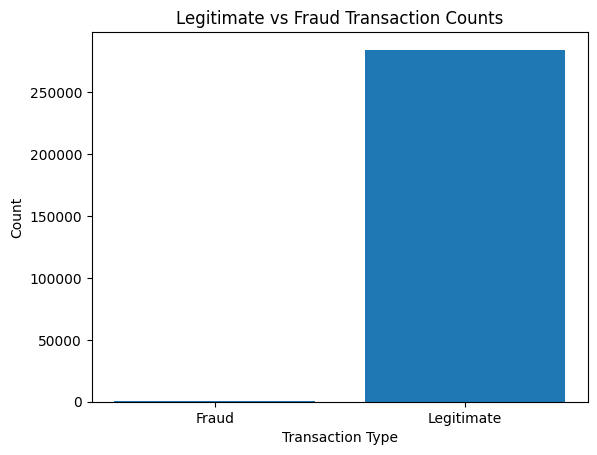

In [37]:
plt.bar(count['index'], count['Class'])
plt.xlabel('Transaction Type')
plt.ylabel('Count')
plt.title('Legitimate vs Fraud Transaction Counts')
plt.show()

In [38]:
fraud = df[df['Class'] == 1]
legitimate = df[df['Class'] == 0]
fraud.shape, legitimate.shape

((492, 31), (284315, 31))

In [39]:
fraud_per = len(fraud)/float(len(df)) * 100
print(fraud_per)

0.1727485630620034


In [40]:
fraud.Amount.describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [41]:
legitimate.Amount.describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

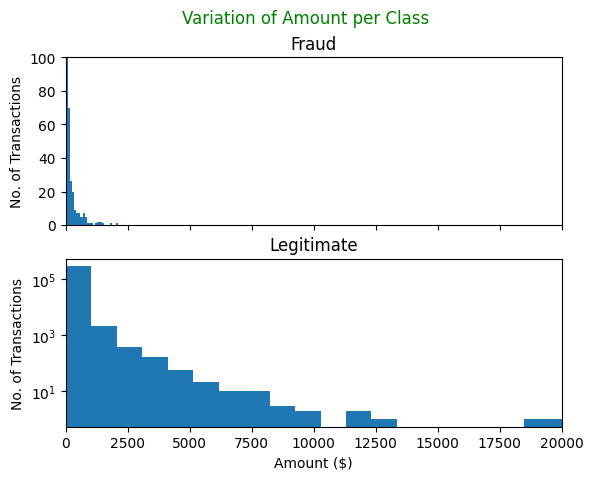

In [42]:
fig, (ax0, ax1) = plt.subplots(nrows=2,ncols=1,sharex=True)
fig.suptitle("Variation of Amount per Class", color='green')
ax0.hist(fraud['Amount'], bins=25)
ax0.set_title('Fraud')
ax0.set_ylim(0, 100)
ax0.set_ylabel('No. of Transactions')

ax1.hist(legitimate['Amount'], bins=25)
ax1.set_title('Legitimate')
ax1.set_ylabel('No. of Transactions')

plt.xlim(0, 20000)
plt.xlabel('Amount ($)')
plt.yscale('log')

## Handling Imbalanced Datasets

### 1) Choosing Appropriate Evaluation Metrics for Robust Performance Evaluation
Accuracy is adequate for a well-balanced class, but it is inadequate for the imbalanced class problem. Other metrics, such as precision and recall, are also taken into account.

The measure `F1 score` is better appropriate for an unbalanced class dataset. The harmonic mean of precision and recall is defined as the `F1 score`. It is used to evaluate performance statistically.  F1 scores vary from 0 to 1. The better the model, the closer it is to 1.

### 2) Resampling

#### Oversampling

In [43]:
df.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [44]:
from sklearn.utils import resample

df_majority = df[(df['Class']==0)].drop('index',axis=1)
df_minority = df[(df['Class']==1)].drop('index',axis=1)

df_minority_oversampled = resample(df_minority,replace=True,n_samples=284315,random_state=56)

df_oversampled = pd.concat([df_minority_oversampled, df_majority])
df_oversampled.Class.value_counts()

1    284315
0    284315
Name: Class, dtype: int64

In [45]:
Data_oversampled = df_oversampled.drop('Class', axis=1)
class_oversampled = df_oversampled['Class']
Data_oversampled.shape, class_oversampled.shape

((568630, 29), (568630,))

#### Undersampling

In [46]:
from imblearn.under_sampling import RandomUnderSampler
from collections import Counter

rus = RandomUnderSampler(random_state=56)

Data_undersampled, class_undersampled = rus.fit_resample(data, cla55)
print(Counter(cla55))
print(Counter(class_undersampled))

Counter({0: 284315, 1: 492})
Counter({0: 492, 1: 492})


### 3) SMOTE
Adding duplicate minority class data frequently does not provide any new information to the model. SMOTE creates new instances based on existing data. To put it simply, SMOTE examines minority class examples and uses k nearest neighbours to select a random nearest neighbour, after which a synthetic instance is generated at random in feature space.

In [48]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(sampling_strategy='minority', random_state=56)

Data_smote,class_smote = sm.fit_resample(data,cla55)
df_smote = pd.concat([pd.DataFrame(Data_smote), pd.DataFrame(class_smote)],axis=1)
df_smote.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 568630 entries, 0 to 568629
Data columns (total 30 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   V1      568630 non-null  float64
 1   V2      568630 non-null  float64
 2   V3      568630 non-null  float64
 3   V4      568630 non-null  float64
 4   V5      568630 non-null  float64
 5   V6      568630 non-null  float64
 6   V7      568630 non-null  float64
 7   V8      568630 non-null  float64
 8   V9      568630 non-null  float64
 9   V10     568630 non-null  float64
 10  V11     568630 non-null  float64
 11  V12     568630 non-null  float64
 12  V13     568630 non-null  float64
 13  V14     568630 non-null  float64
 14  V15     568630 non-null  float64
 15  V16     568630 non-null  float64
 16  V17     568630 non-null  float64
 17  V18     568630 non-null  float64
 18  V19     568630 non-null  float64
 19  V20     568630 non-null  float64
 20  V21     568630 non-null  float64
 21  V22     56

In [49]:
df_smote.Class.value_counts()

0    284315
1    284315
Name: Class, dtype: int64